In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
def read_log_file(file_path):
    with open(file_path, 'r') as file:
        logs = file.readlines()

    data = []
    for log in logs:
        match = re.search(r'Epoch: (\d+), Batch: (\d+), Loss: ([\d\.]+)', log)
        if match:
            epoch, batch, loss = match.groups()
            data.append({
                'epoch': int(epoch),
                'batch': int(batch),
                'loss': float(loss)
            })

    return pd.DataFrame(data)

In [3]:
logs_B16 = "/home/agambetti/PhD/multi-media-interaction/experiments/rq2_restaurants/CLIP/paper_replication/logs/logs-B16.txt"
logs_B16FT = "/home/agambetti/PhD/multi-media-interaction/experiments/rq2_restaurants/CLIP/paper_replication/logs/logs_ft-B16.txt"

df = read_log_file(logs_B16)
df.head()

,epoch,batch,loss
0,1,100,5.102554
1,1,200,3.967472
2,1,300,3.577703
3,1,400,3.380114
4,1,500,3.260757


In [4]:
df_ft = read_log_file(logs_B16FT)

<Axes: title={'center': 'B16FT'}, xlabel='batch'>

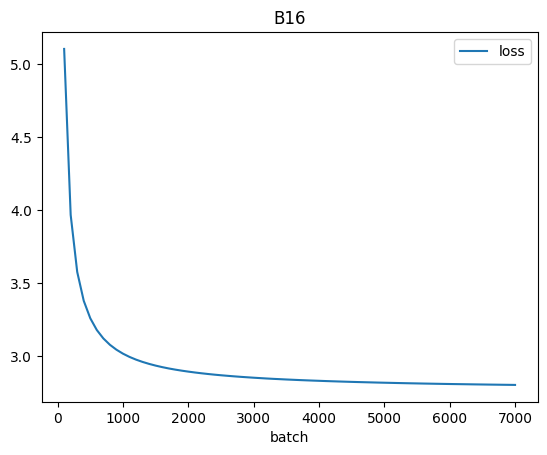

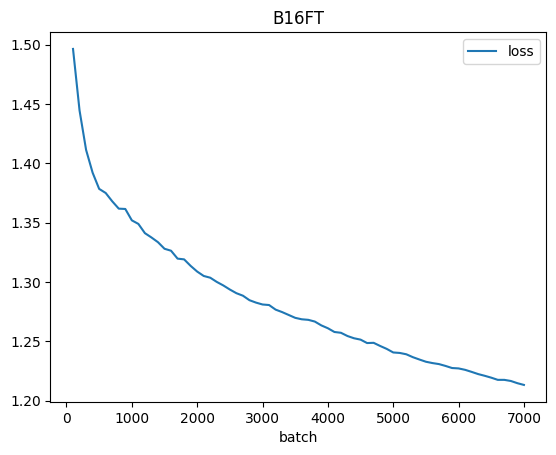

In [5]:
df[df.epoch == 1].plot(x='batch', y='loss', title='B16')
df_ft[df_ft.epoch == 1].plot(x='batch', y='loss', title='B16FT')

In [6]:
df_epoch1 = df[df.epoch == 1]
df_ft_epoch1 = df_ft[df_ft.epoch == 1]

In [11]:
df[df.epoch == 2].mean()

epoch       2.000000
batch    3550.000000
loss        2.769957
dtype: float64

In [13]:
df_ft[df_ft.epoch == 1].mean()

epoch       1.000000
batch    3550.000000
loss        1.283901
dtype: float64

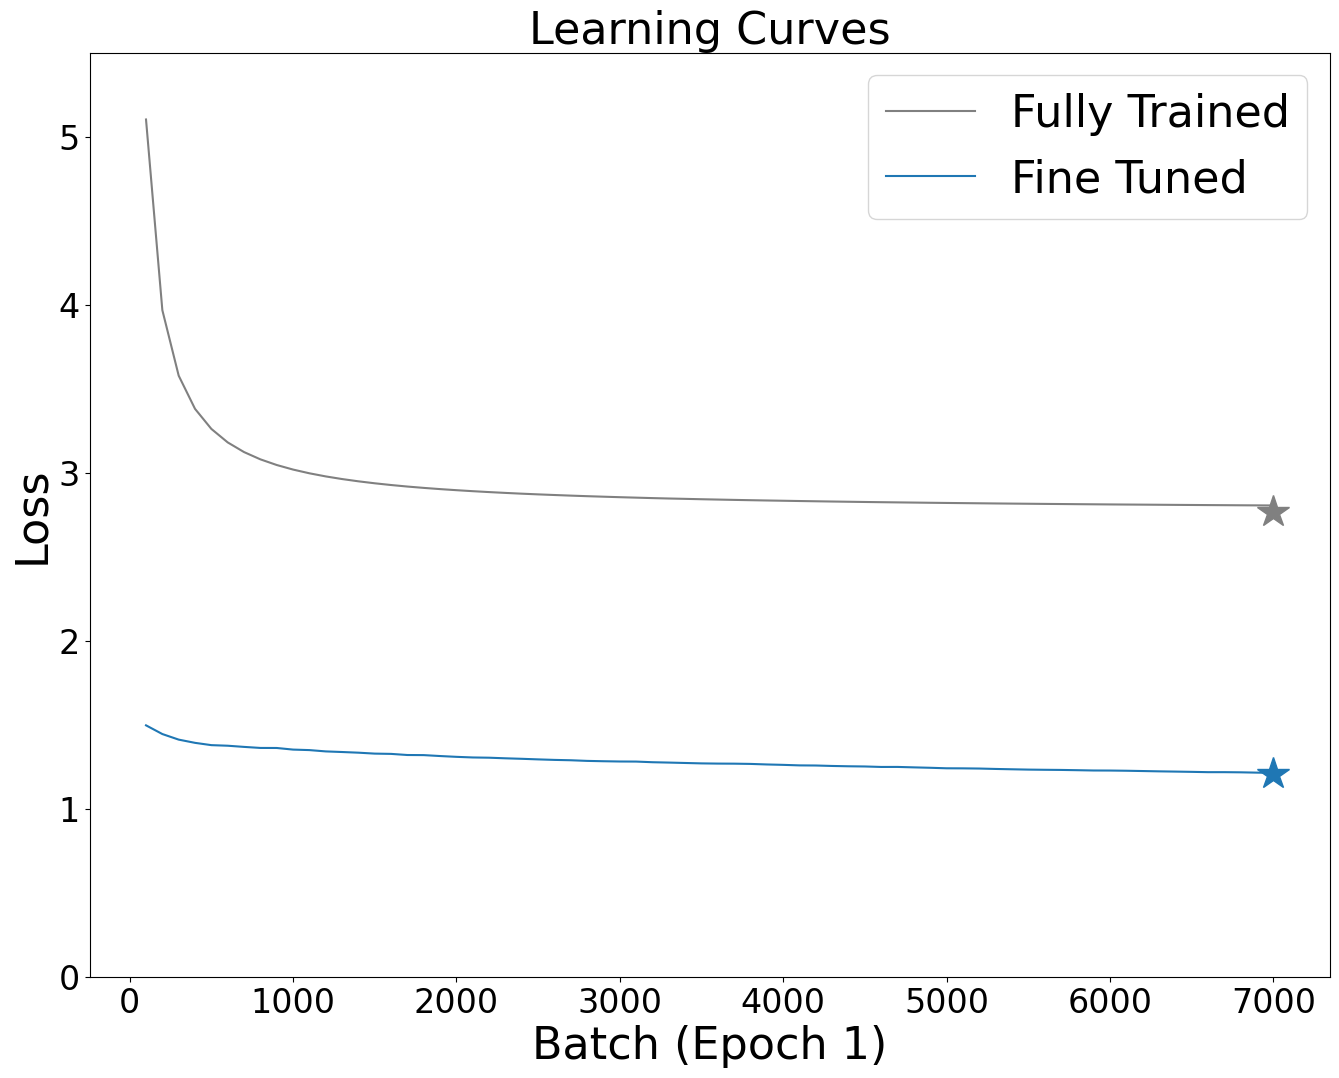

In [24]:
plt.figure(figsize=(16, 12))
plt.plot(df_epoch1.batch, df_epoch1.loss, label='Fully Trained', color='grey')
plt.plot(df_ft_epoch1.batch, df_ft_epoch1.loss, label='Fine Tuned')
plt.plot(7000, 2.7654, '*', c='grey', markersize=24) # STAR 
plt.plot(7000, 1.2071, '*', c='#1f77b4', markersize=24) # STAR
plt.ylim(0, 5.5)
plt.legend(fontsize=32)
plt.title('Learning Curves', fontsize = 32)
plt.xlabel('Batch (Epoch 1)', fontsize=32)
plt.ylabel('Loss', fontsize=32)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()